In [39]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

from scipy.sparse import spdiags, eye
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags
from scipy.interpolate import LinearNDInterpolator, interp1d, lagrange
from sympy.polys.polyfuncs import interpolate
from numpy.polynomial.polynomial import Polynomial

%matplotlib inline

In [111]:
eps = 1e-10
N = 3
x = np.linspace(0, 1, N)
Delta = np.diff(x)
Delta = Delta[0]

temp = [np.ones( x.size), -2 * np.ones(x.size), np.ones(x.size)]
M = spdiags(temp, [-1, 0, 1], x.size, x.size, format = 'csc')
M[0,1] = 2; M[-1, -2] = 0; M[-1, -1] = 0
E = eye(x.size, format = 'csc')

u_old = np.zeros(x.size)
u_new = np.ones(x.size) 

while np.linalg.norm(u_new - u_old) >= eps:
    u_old = u_new
    u_old[-1] = 1
    
    L = -M/Delta**2 + E + spdiags(3 * u_old**2, 0, x.size, x.size, format = 'csc')
    r = (M/Delta**2  - E) * u_old - E * u_old**3 + np.ones(x.size)
    delta_u = spsolve(L[:-1, :-1], r[:-1])
    delta_u = np.append(delta_u, 0)
    u_new = u_old + delta_u
    
u = u_new

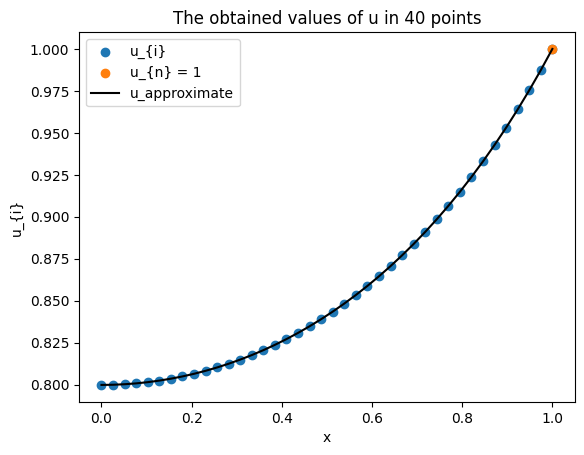

In [112]:
plt.figure()
plt.scatter(x, u)
plt.scatter(x[-1], u[-1])
plt.plot(x, u, "k")
plt.legend(['u_{i}', 'u_{n} = 1', 'u_approximate'])
plt.xlabel("x")
plt.ylabel("u_{i}")
plt.title("The obtained values of u in {0} points".format(N))
plt.show()
#plt.plot(x, u, 'k')

In [113]:
pts = tuple(map(tuple, np.array((x, u)).T))
t = sy.Symbol('t')
f = sy.lambdify(t, sy.interpolate(pts, t))
f_derivative = sy.lambdify(t, sy.diff(sy.interpolate(pts, t), t))

In [114]:
t = np.linspace(0, 1, 10)
u_res = f(t) 
u_res_derivative = f_derivative(t)

u_test_point = f(1)
u_test_point_der = f_derivative(0)

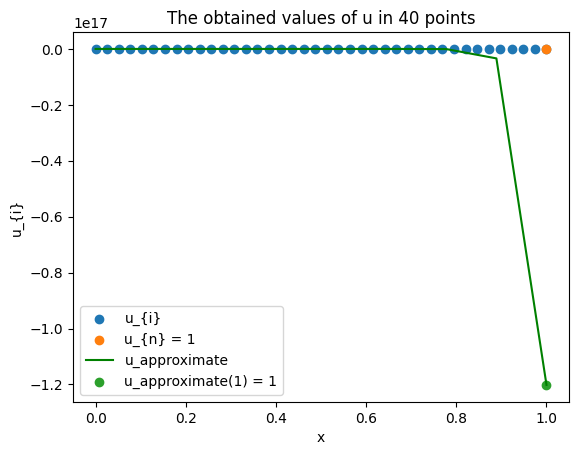

In [115]:
plt.figure()
plt.scatter(x, u)
plt.scatter(x[-1], u[-1])

plt.plot(t, u_res, 'g')
plt.scatter(1.0, u_test_point)

plt.legend(['u_{i}', 'u_{n} = 1', 'u_approximate','u_approximate(1) = 1' ])
plt.xlabel("x")
plt.ylabel("u_{i}")
plt.title("The obtained values of u in {0} points".format(N))
plt.show()
#plt.plot(x, u, 'k')


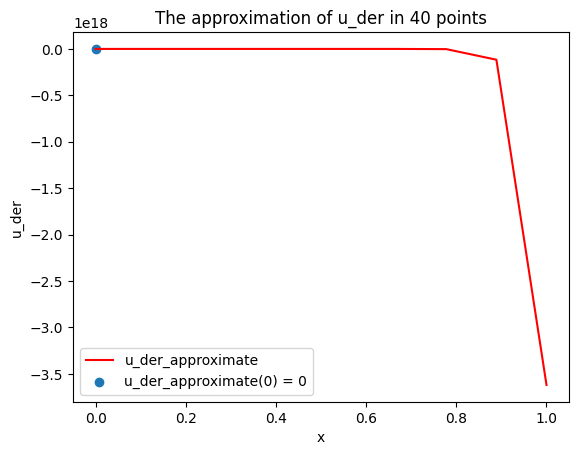

In [116]:
plt.figure()
plt.plot(t, u_res_derivative, 'r')
plt.scatter(0.0, u_test_point_der)

plt.legend(['u_der_approximate','u_der_approximate(0) = 0' ])
plt.xlabel("x")
plt.ylabel("u_der")
plt.title("The approximation of u_der in {0} points".format(N))
plt.show()